In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')

In [2]:
import os
import array

import pandas
import numpy

import plotly.express
import librosa
from matplotlib import pyplot as plt

from software.dataset.hussain2021 import load_data, load_meta
#from firmware.process import GravitySplitter

In [3]:

#dataset_path = './data/hx5kkkbr3j-1'
combined_path = '../data/hussain2021_brush_manual_s1.parquet'
samplerate = 50
lower = 2.0
upper = 5.0

In [4]:
acc_re = pandas.read_parquet(combined_path)
print(acc_re.shape, acc_re.columns)
data_columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_z', 'gyro_y', 'gyro_z']
index_columns = ['filename', 'time']
meta_columns = list(set(acc_re.columns) - set(data_columns) - set(index_columns))
acc_re

(188820, 18) Index(['time', 'filename', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y',
       'gyro_z', 'setting', 'subject', 'session', 'gender', 'hand',
       'sensor_location', 'brush', 'location', 'sensor', 'label'],
      dtype='object')


time                   filename    acc_x  \
0      2020-07-25 11:52:33.840000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.19950   
1      2020-07-25 11:52:33.860000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.19740   
2      2020-07-25 11:52:33.880000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.20700   
3      2020-07-25 11:52:33.900000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.20700   
4      2020-07-25 11:52:33.920000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.21320   
...                                 ...                        ...      ...   
188815 2020-08-10 02:10:30.140000+00:00   S9-S1-M-R-A-30-M-2-A.csv  0.13675   
188816 2020-08-10 02:10:30.160000+00:00   S9-S1-M-R-A-30-M-2-A.csv  0.14525   
188817 2020-08-10 02:10:30.180000+00:00   S9-S1-M-R-A-30-M-2-A.csv  0.15075   
188818 2020-08-10 02:10:30.200000+00:00   S9-S1-M-R-A-30-M-2-A.csv  0.15175   
188819 2020-08-10 02:10:30.220000+00:00   S9-S1-M-R-A-30-M-2-A.csv  0.14350   

          acc_y    acc_z     gyro_x    gyro_y     gyro_z setting subject  \
0      -0.47075  0.85450   4.801750  -0.70100  -2.362750    None     S11   
1      -0.47820  0.86940   6.670800   2.93920  -1.475200    None     S11   
2      -0.48400  0.90000   8.109667   2.43900  -1.747667    None     S11   
3      -0.48650  0.90675   3.612750  -0.03050  -2.408500    None     S11   
4      -0.46800  0.89360   3.829400   0.47540  -1.987800    None     S11   
...         ...      ...        ...       ...        ...     ...     ...   
188815  0.67175  0.74225  18.643250  20.38125  23.750000    None      S9   
188816  0.69975  0.74625  16.174000  20.67100  22.256000    None      S9   
188817  0.73275  0.76000  16.250000  19.77150  21.783250    None      S9   
188818  0.74875  0.74175  16.874750  16.75300  23.003250    None      S9   
188819  0.74600  0.72550  16.098000  15.82350  24.115500    None      S9   

        session gender hand sensor_location brush location sensor label  
0             2      F    R               A     M        3      A   NaN  
1             2      F    R               A     M        3      A   NaN  
2             2      F    R               A     M        3      A   NaN  
3             2      F    R               A     M        3      A   NaN  
4             2      F    R               A     M        3      A   NaN  
...         ...    ...  ...             ...   ...      ...    ...   ...  
188815        1      M    R               A     M        2      A   NaN  
188816        1      M    R               A     M        2      A   NaN  
188817        1      M    R               A     M        2      A   NaN  
188818        1      M    R               A     M        2      A   NaN  
188819        1      M    R               A     M        2      A   NaN  

[188820 rows x 18 columns]

In [5]:
acc_re.sort_values(['filename', 'time']).iloc[0:20]


time                   filename     acc_x  \
0  2020-07-25 11:52:33.840000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.199500   
1  2020-07-25 11:52:33.860000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.197400   
2  2020-07-25 11:52:33.880000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.207000   
3  2020-07-25 11:52:33.900000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.207000   
4  2020-07-25 11:52:33.920000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.213200   
5  2020-07-25 11:52:33.940000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.211000   
6  2020-07-25 11:52:33.960000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.211500   
7  2020-07-25 11:52:33.980000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.213250   
8         2020-07-25 11:52:34+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.219000   
9  2020-07-25 11:52:34.020000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.220750   
10 2020-07-25 11:52:34.040000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.226667   
11 2020-07-25 11:52:34.060000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.226500   
12 2020-07-25 11:52:34.080000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.215500   
13 2020-07-25 11:52:34.100000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.202667   
14 2020-07-25 11:52:34.120000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.213500   
15 2020-07-25 11:52:34.140000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.222500   
16 2020-07-25 11:52:34.160000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.223667   
17 2020-07-25 11:52:34.180000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.210500   
18 2020-07-25 11:52:34.200000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.200500   
19 2020-07-25 11:52:34.220000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.193500   

       acc_y     acc_z    gyro_x    gyro_y    gyro_z setting subject  session  \
0  -0.470750  0.854500  4.801750 -0.701000 -2.362750    None     S11        2   
1  -0.478200  0.869400  6.670800  2.939200 -1.475200    None     S11        2   
2  -0.484000  0.900000  8.109667  2.439000 -1.747667    None     S11        2   
3  -0.486500  0.906750  3.612750 -0.030500 -2.408500    None     S11        2   
4  -0.468000  0.893600  3.829400  0.475400 -1.987800    None     S11        2   
5  -0.483667  0.912667 -2.601667  3.658667  0.630333    None     S11        2   
6  -0.499000  0.931000 -1.753000  1.951000 -0.884000    None     S11        2   
7  -0.488750  0.915500  0.183000 -3.246750 -3.811000    None     S11        2   
8  -0.457250  0.876750  0.533750 -3.414500 -3.719500    None     S11        2   
9  -0.466000  0.867750  0.107000  0.183000 -0.823250    None     S11        2   
10 -0.471667  0.888667 -2.886333  1.870000 -0.467667    None     S11        2   
11 -0.465250  0.884000 -1.265250 -0.564000 -0.427000    None     S11        2   
12 -0.471500  0.874250 -0.609750 -3.064250  0.335500    None     S11        2   
13 -0.478333  0.848000  2.317333 -1.707333  0.508333    None     S11        2   
14 -0.466750  0.858250  0.045750  2.987750  0.686000    None     S11        2   
15 -0.464250  0.889000  1.433000  3.460250  2.591500    None     S11        2   
16 -0.460000  0.898000  6.808667  0.386000  2.540667    None     S11        2   
17 -0.467500  0.905750  6.829500 -0.701500  3.872000    None     S11        2   
18 -0.481500  0.932500  1.143250  1.356750  4.771250    None     S11        2   
19 -0.477250  0.923000 -1.875000  0.350500  3.460250    None     S11        2   

   gender hand sensor_location brush location sensor label  
0       F    R               A     M        3      A   NaN  
1       F    R               A     M        3      A   NaN  
2       F    R               A     M        3      A   NaN  
3       F    R               A     M        3      A   NaN  
4       F    R               A     M        3      A   NaN  
5       F    R               A     M        3      A   NaN  
6       F    R               A     M        3      A   NaN  
7       F    R               A     M        3      A   NaN  
8       F    R               A     M        3      A   NaN  
9       F    R               A     M        3      A   NaN  
10      F    R               A     M        3      A   NaN  


In [6]:
acc_re.reset_index().groupby('filename').apply(lambda df: df['time'].max() - df['time'].min(), include_groups=False).sum()

Timedelta('0 days 01:02:55.900000')

In [7]:
#(11632*15)/pandas.Timedelta(seconds=(50*60))

In [8]:
acc_re[acc_re.label.isna()]

time                   filename    acc_x  \
0      2020-07-25 11:52:33.840000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.19950   
1      2020-07-25 11:52:33.860000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.19740   
2      2020-07-25 11:52:33.880000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.20700   
3      2020-07-25 11:52:33.900000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.20700   
4      2020-07-25 11:52:33.920000+00:00  S11-S2-F-R-A-30-M-3-A.csv  0.21320   
...                                 ...                        ...      ...   
188815 2020-08-10 02:10:30.140000+00:00   S9-S1-M-R-A-30-M-2-A.csv  0.13675   
188816 2020-08-10 02:10:30.160000+00:00   S9-S1-M-R-A-30-M-2-A.csv  0.14525   
188817 2020-08-10 02:10:30.180000+00:00   S9-S1-M-R-A-30-M-2-A.csv  0.15075   
188818 2020-08-10 02:10:30.200000+00:00   S9-S1-M-R-A-30-M-2-A.csv  0.15175   
188819 2020-08-10 02:10:30.220000+00:00   S9-S1-M-R-A-30-M-2-A.csv  0.14350   

          acc_y    acc_z     gyro_x    gyro_y     gyro_z setting subject  \
0      -0.47075  0.85450   4.801750  -0.70100  -2.362750    None     S11   
1      -0.47820  0.86940   6.670800   2.93920  -1.475200    None     S11   
2      -0.48400  0.90000   8.109667   2.43900  -1.747667    None     S11   
3      -0.48650  0.90675   3.612750  -0.03050  -2.408500    None     S11   
4      -0.46800  0.89360   3.829400   0.47540  -1.987800    None     S11   
...         ...      ...        ...       ...        ...     ...     ...   
188815  0.67175  0.74225  18.643250  20.38125  23.750000    None      S9   
188816  0.69975  0.74625  16.174000  20.67100  22.256000    None      S9   
188817  0.73275  0.76000  16.250000  19.77150  21.783250    None      S9   
188818  0.74875  0.74175  16.874750  16.75300  23.003250    None      S9   
188819  0.74600  0.72550  16.098000  15.82350  24.115500    None      S9   

        session gender hand sensor_location brush location sensor label  
0             2      F    R               A     M        3      A   NaN  
1             2      F    R               A     M        3      A   NaN  
2             2      F    R               A     M        3      A   NaN  
3             2      F    R               A     M        3      A   NaN  
4             2      F    R               A     M        3      A   NaN  
...         ...    ...  ...             ...   ...      ...    ...   ...  
188815        1      M    R               A     M        2      A   NaN  
188816        1      M    R               A     M        2      A   NaN  
188817        1      M    R               A     M        2      A   NaN  
188818        1      M    R               A     M        2      A   NaN  
188819        1      M    R               A     M        2      A   NaN  

[31935 rows x 18 columns]

In [9]:
for (filename, label), count in acc_re.groupby('filename').label.value_counts(dropna=False).items():
    if not pandas.isna(label):
        continue
    print(filename, label, count)


S11-S2-F-R-A-30-M-3-A.csv nan 767
S11-S3-F-R-A-30-M-3-A.csv nan 1001
S11-S4-F-R-A-30-M-3-A.csv nan 830
S11-S5-F-R-A-30-M-3-A.csv nan 635
S12-S2-F-R-A-32-M-4-A.csv nan 648
S12-S3-F-R-A-32-M-4-A.csv nan 596
S12-S4-F-R-A-32-M-4-A.csv nan 618
S12-S5-F-R-A-32-M-5-A.csv nan 438
S13-S2-F-R-A-30-M-4-A.csv nan 664
S13-S4-F-R-A-30-M-5-A.csv nan 539
S14-S1-F-R-A-35-M-5-A.csv nan 455
S15-S1-F-R-A-30-M-5-A.csv nan 9939
S17-S1-M-R-A-40-M-2-A.csv nan 456
S2-S1-M-R-A-29-M-1-A.csv nan 479
S2-S2-M-R-A-29-M-1-A.csv nan 549
S2-S3-M-R-A-29-M-1-A.csv nan 710
S2-S5-M-R-A-29-M-1-A.csv nan 692
S4-S1-F-R-A-26-M-1-A.csv nan 1654
S5-S4-M-R-A-40-M-2-A.csv nan 445
S6-S2-M-R-A-30-M-2-A.csv nan 6544
S6-S3-M-R-A-30-M-2-A.csv nan 931
S6-S4-M-R-A-30-M-2-A.csv nan 599
S6-S5-M-R-A-30-M-2-A.csv nan 471
S7-S4-M-R-A-31-M-2-A.csv nan 717
S9-S1-M-R-A-30-M-2-A.csv nan 558


In [10]:
s = acc_re.label.value_counts(dropna=False).index[0]
print(type(s), s)

<class 'float'> nan


In [11]:
import seaborn

16


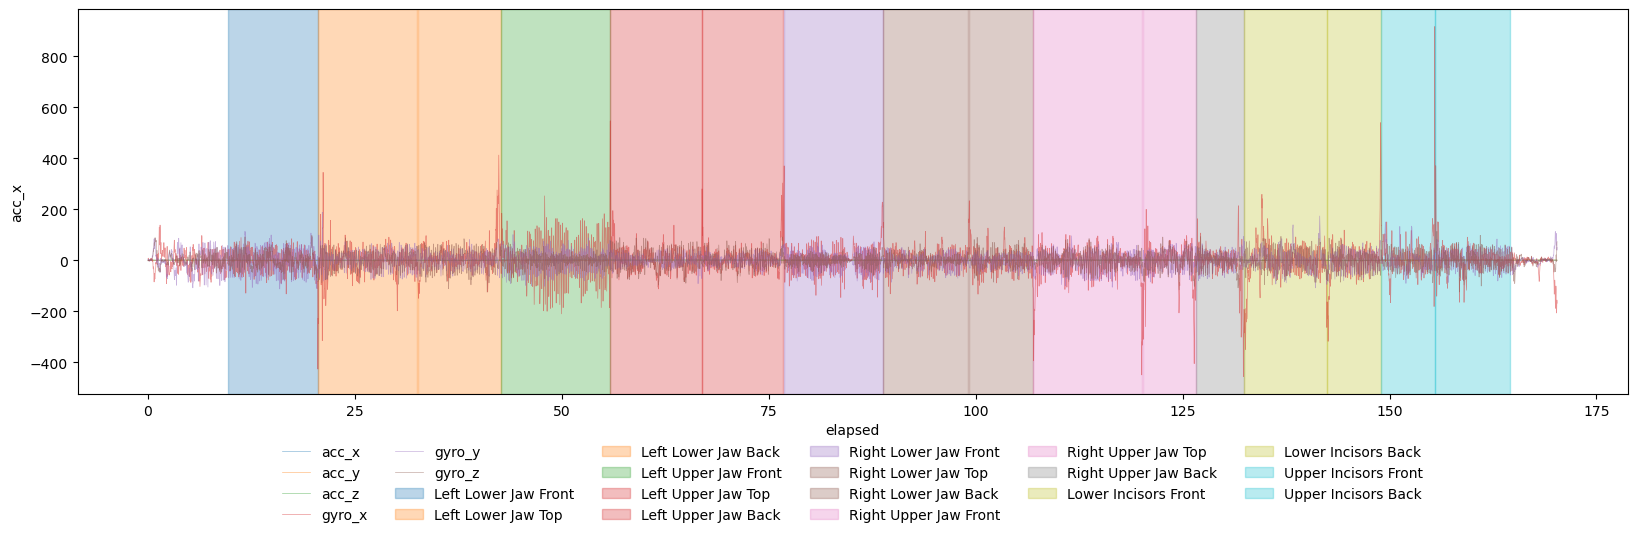

In [17]:

import pandas as pd
import numpy as np

def plot_spans(ax, df, time_col, label_col, colors=None, alpha=0.3):
    if colors is None:
        unique_labels = df[label_col].unique()
        colors = dict(zip(unique_labels, plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))))
    
    # Group consecutive rows with same label
    df = df.copy()
    df = df.dropna(subset=label_col) # avoid NaNs
    #df = df.fillna(subset=label_col, 'none')
    df['group'] = (df[label_col] != df[label_col].shift()).cumsum()

    groups = df.groupby('group')
    print(len(groups))
    
    for _, group in groups:
        label = group[label_col].iloc[0]
        start = group[time_col].iloc[0]
        end = group[time_col].iloc[-1]
        ax.axvspan(start, end, alpha=alpha, color=colors[label], label=label)
    
    # Remove duplicate legend entries
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())
    

def plot_timeline(df, sr=50, columns=None):
    if columns is None:
        columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']

    df = df.sort_values('time')
    
    df = df.reset_index()
    df = df.dropna(subset=columns)
    #df = df.iloc[0:(sr*60*1)]

    df['elapsed'] = (df['time'] - df['time'].min()) / pandas.Timedelta(seconds=1)

    fig, ax = plt.subplots(1, figsize=(20, 5))
    for c in columns:
        seaborn.lineplot(ax=ax, data=df, x='elapsed', y=c, lw=0.5, alpha=0.5, label=c)
        #ax.plot(

    plot_spans(ax=ax, df=df, time_col='elapsed', label_col='label')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6, frameon=False)
    
    return fig

grouped = acc_re.groupby('filename')
for idx, g in grouped:
    plot_timeline(g)
    break


In [13]:
def make_spectrogram(df, sr=50, hop_length=16, columns=None):
    if columns is None:
        columns = ['acc_x', 'acc_y', 'acc_z']
    df = df.sort_values('time')
    df = df.dropna(subset=columns)

    n_fft = 4*hop_length

    # Make combined XYZ spectrogram, concat on frequency axis
    ss = []
    for c in columns:
        v = df[c].values
        #print(v.shape)
        S = librosa.stft(v, n_fft=n_fft, hop_length=hop_length)
        S = numpy.abs(S)
        S = librosa.amplitude_to_db(S)
        #S = S[0:n_fft//4, :]
        #S = S[1:,:] # drop DC
        #print(S.shape)
        ss.append(S)

    #raise Exception('ff')
    o = numpy.concatenate(ss)
    #print('o', o.shape)
    return o

mm = acc_re
grouped = mm.groupby('filename')
hop_length=32
for idx, g in grouped:
    make_spectrogram(g, hop_length=hop_length)
    break
specs = grouped.apply(make_spectrogram, include_groups=False, hop_length=hop_length).to_frame().rename(columns={0:'spectrogram'})
specs;

/tmp/ipykernel_341201/1340151317.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, figsize=(20, 8))


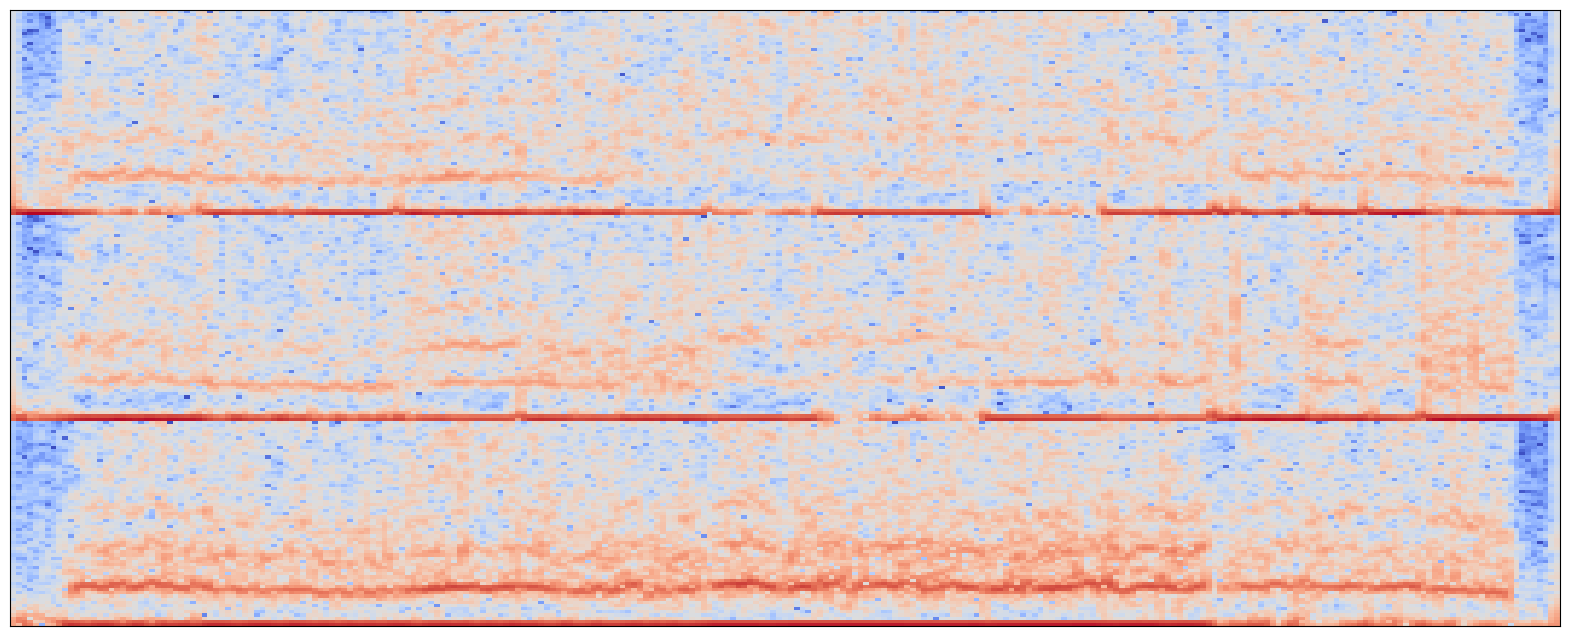

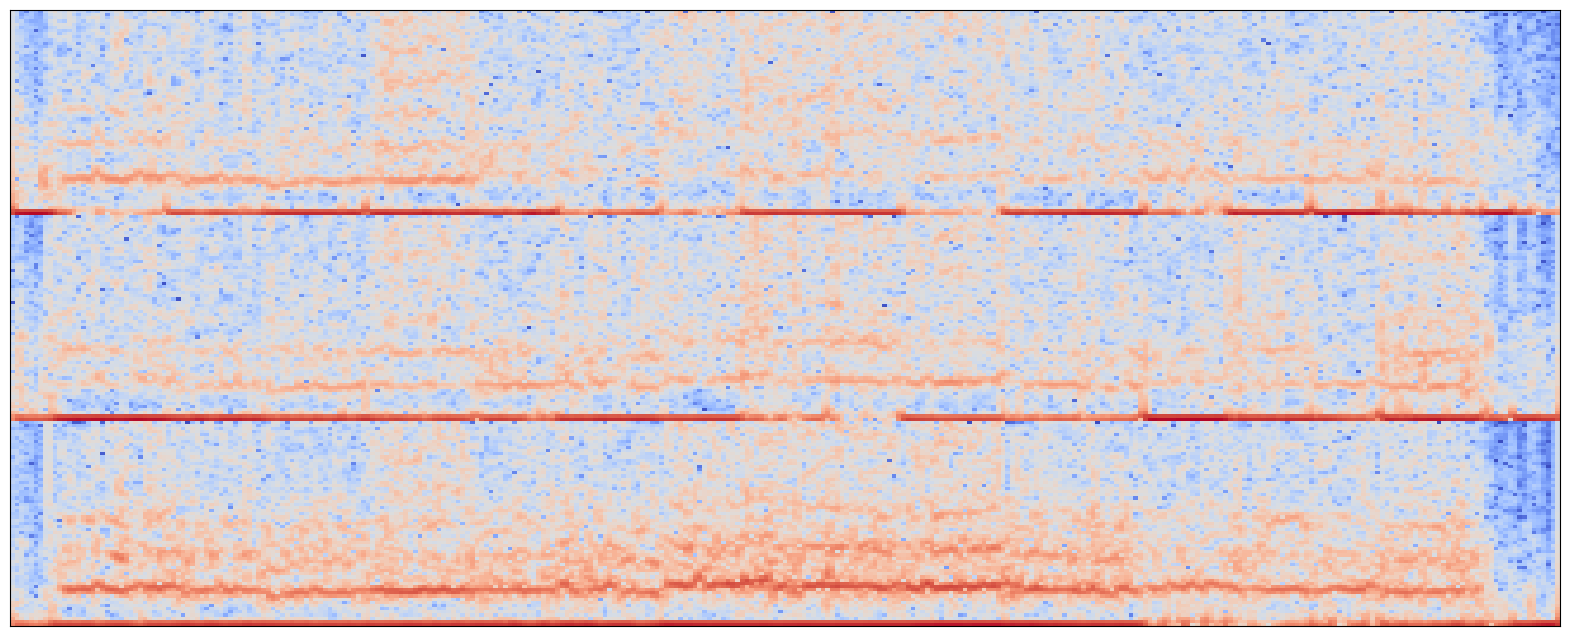

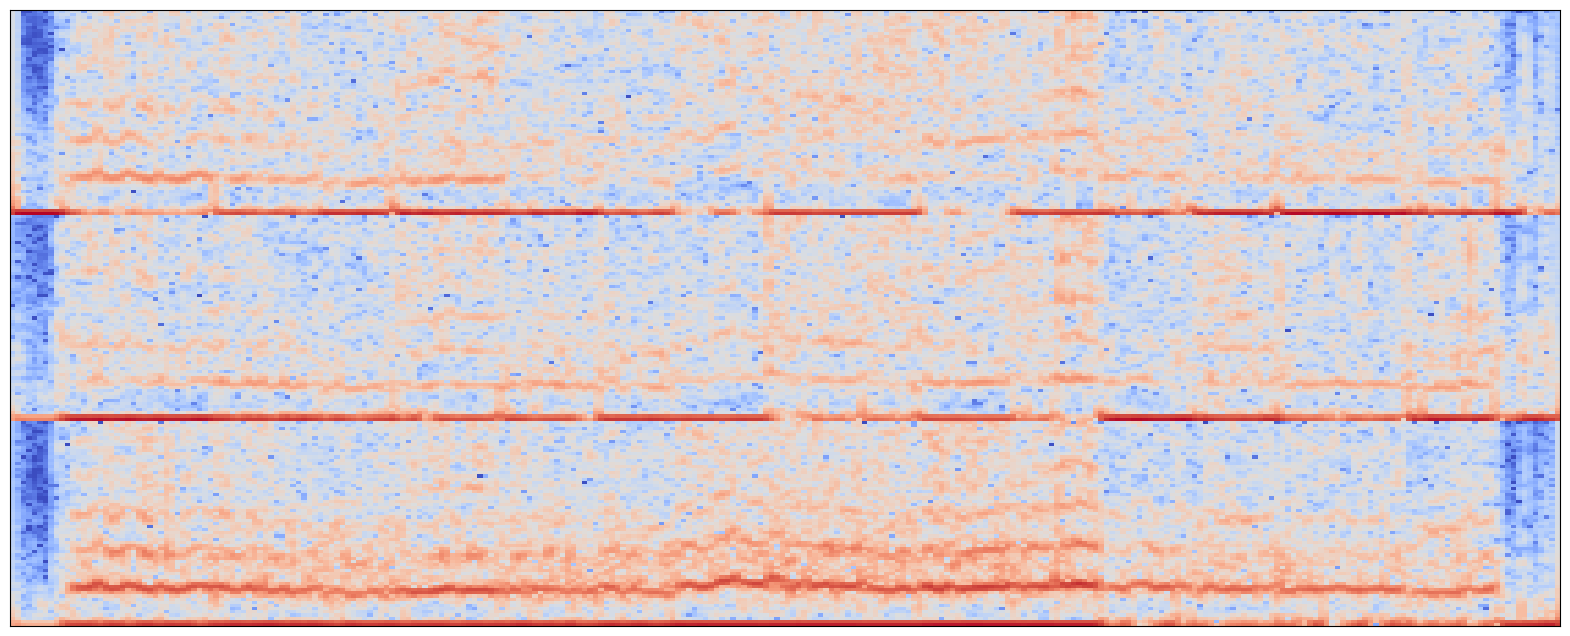

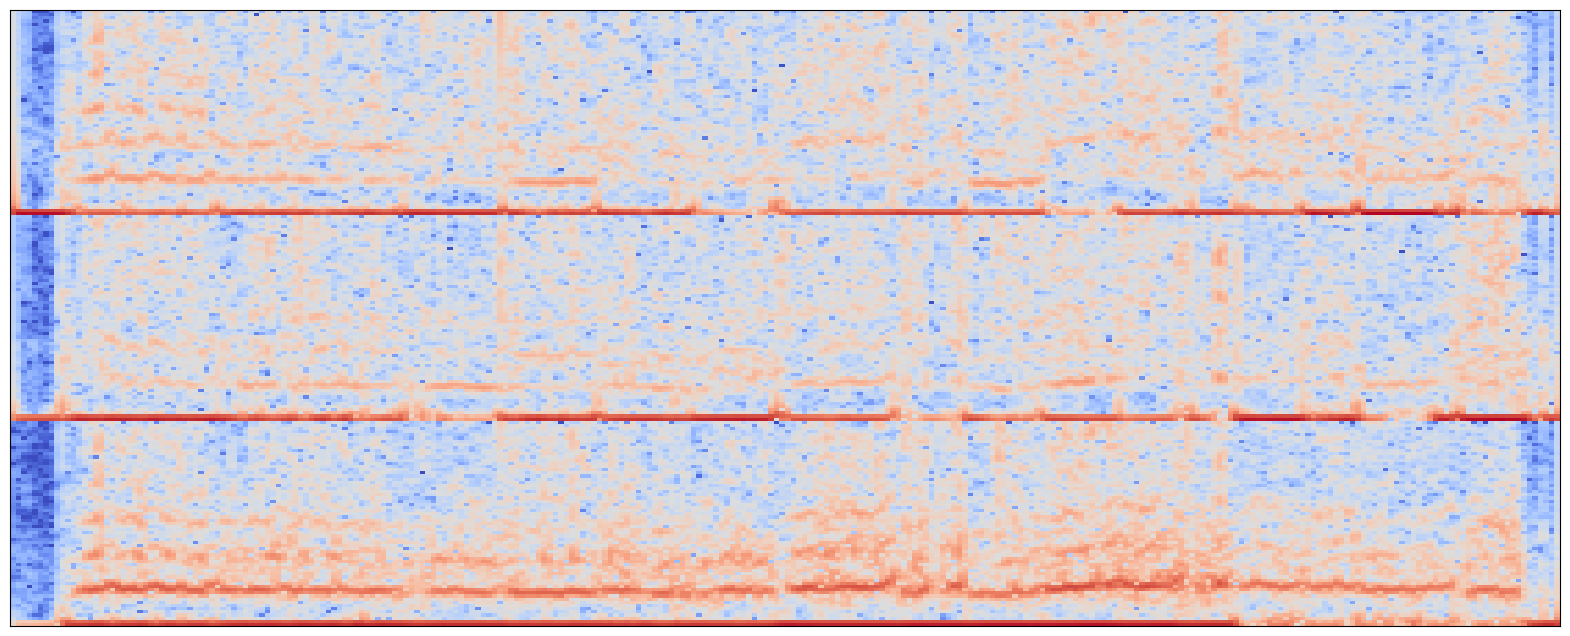

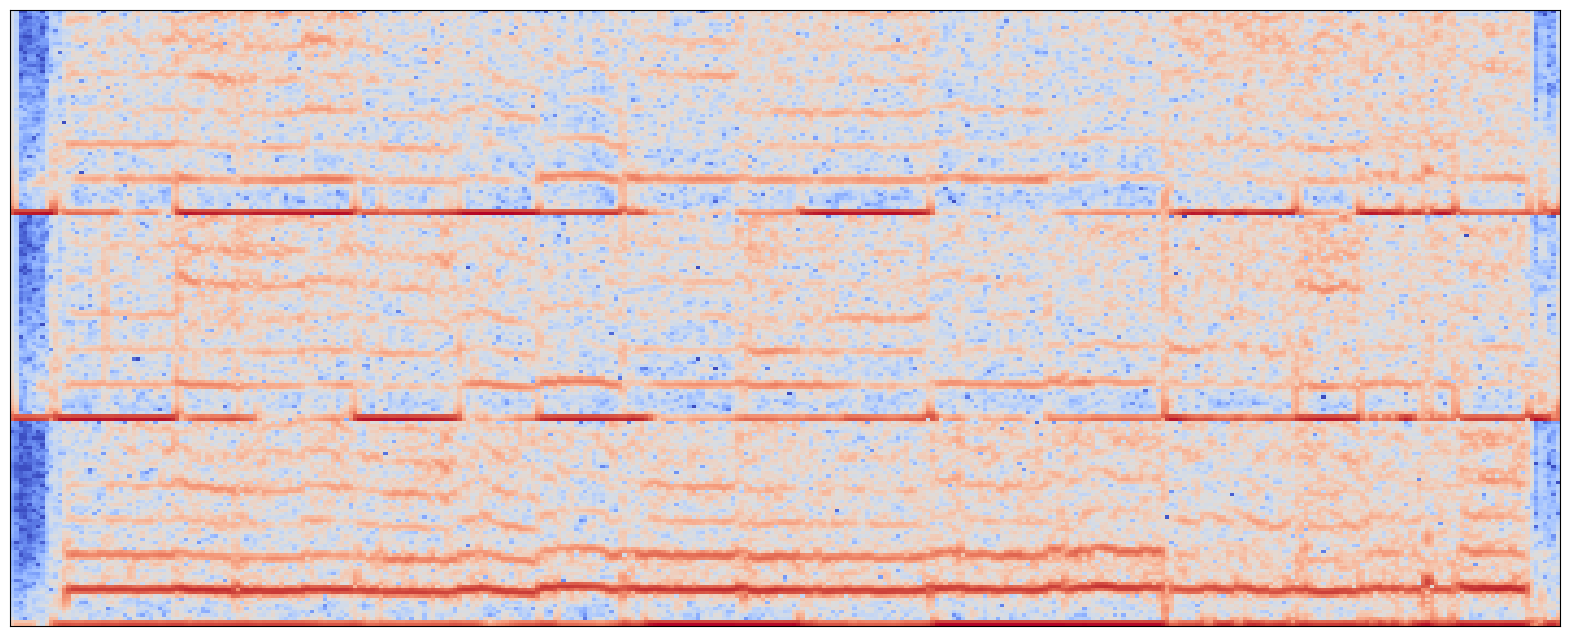

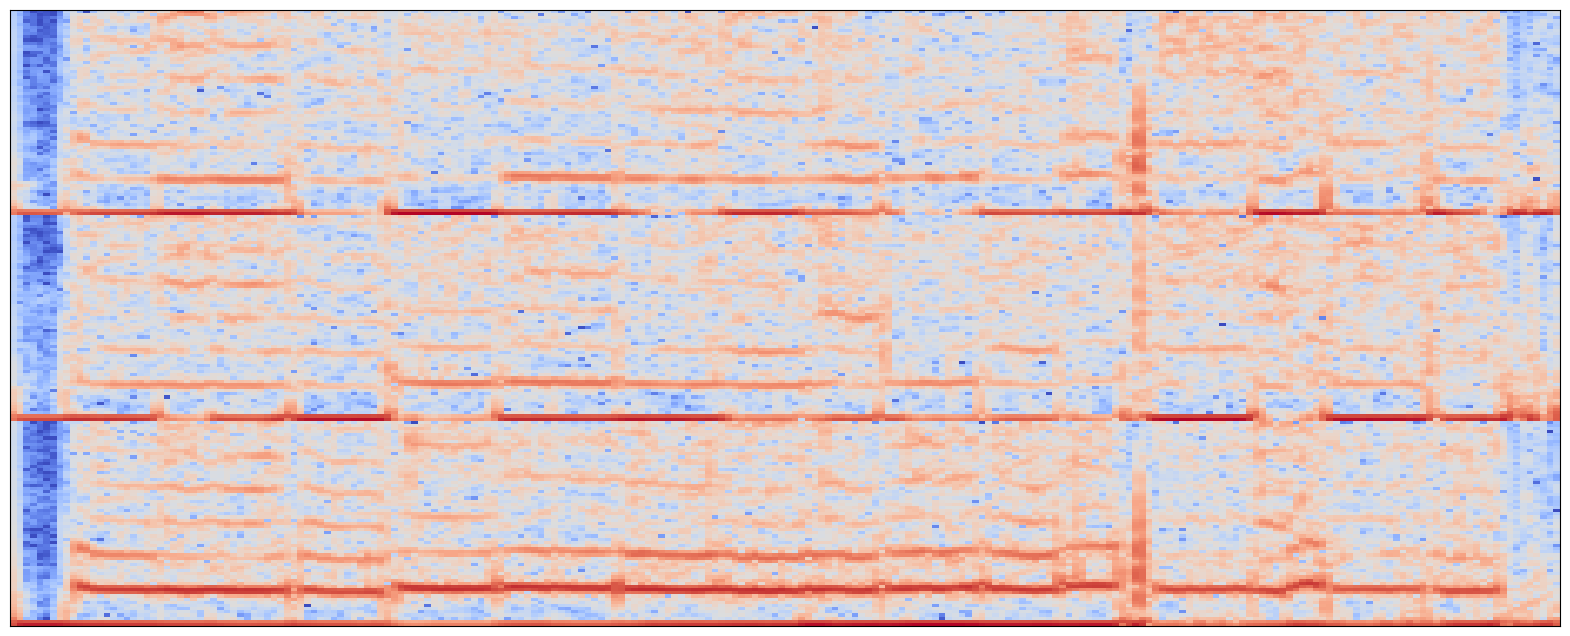

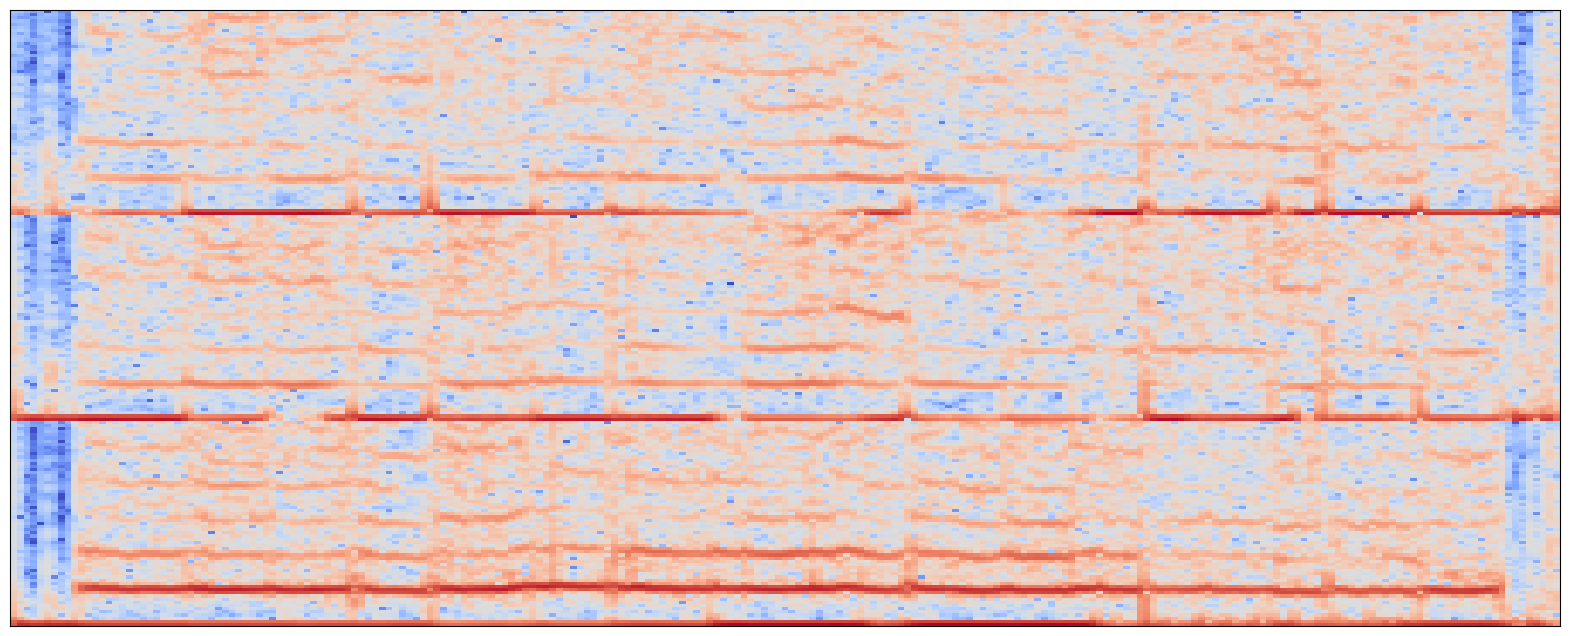

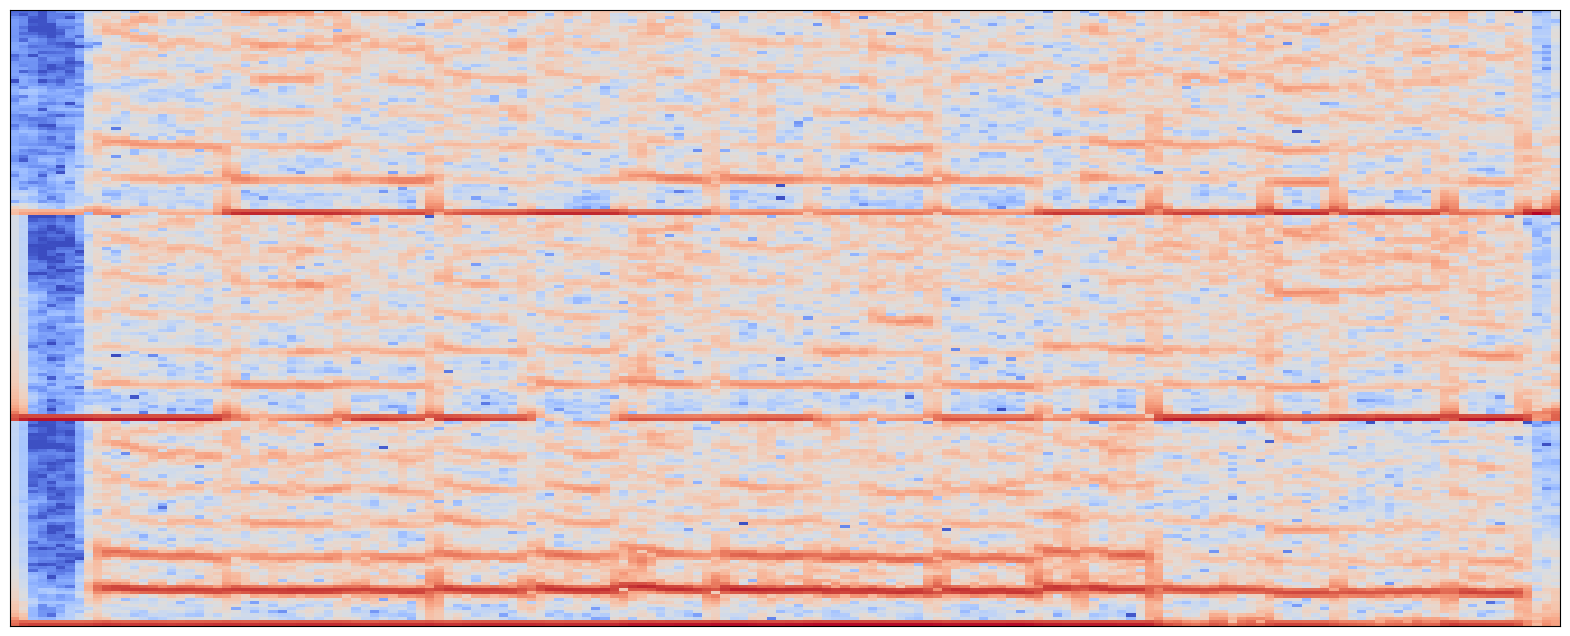

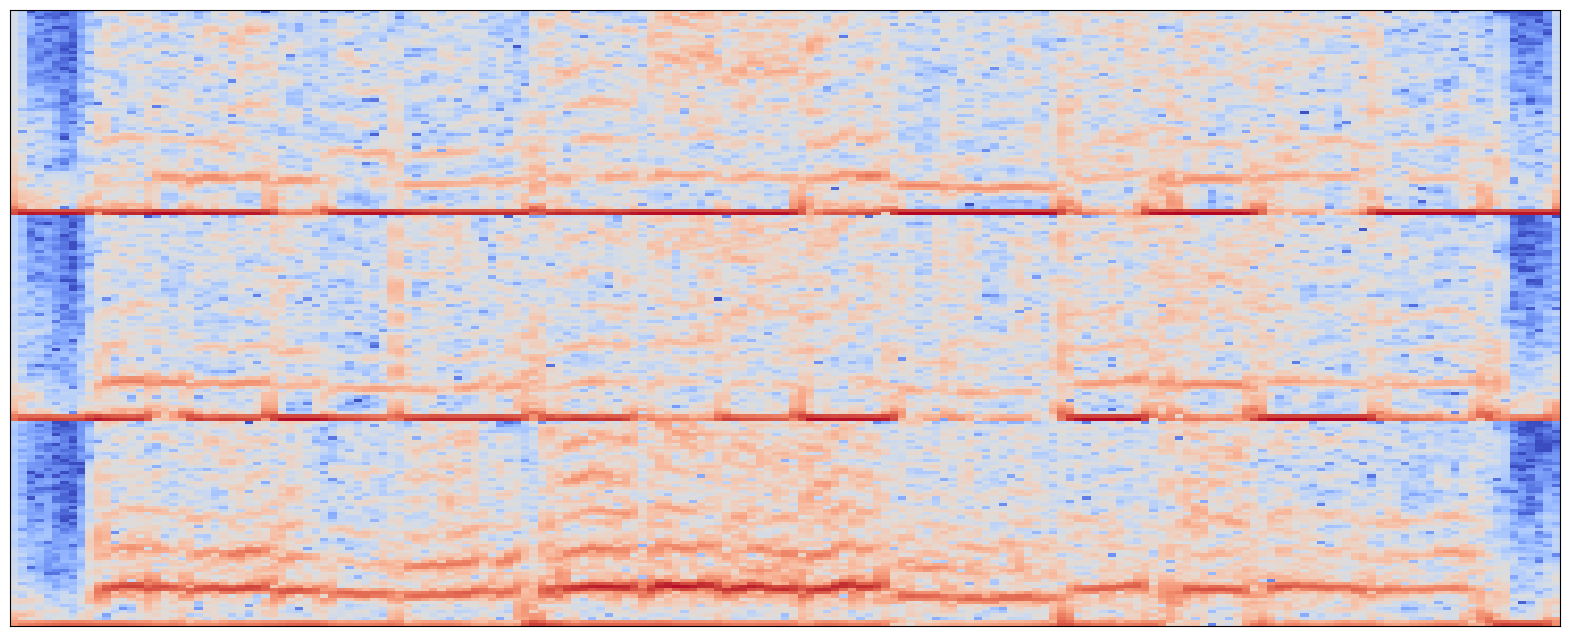

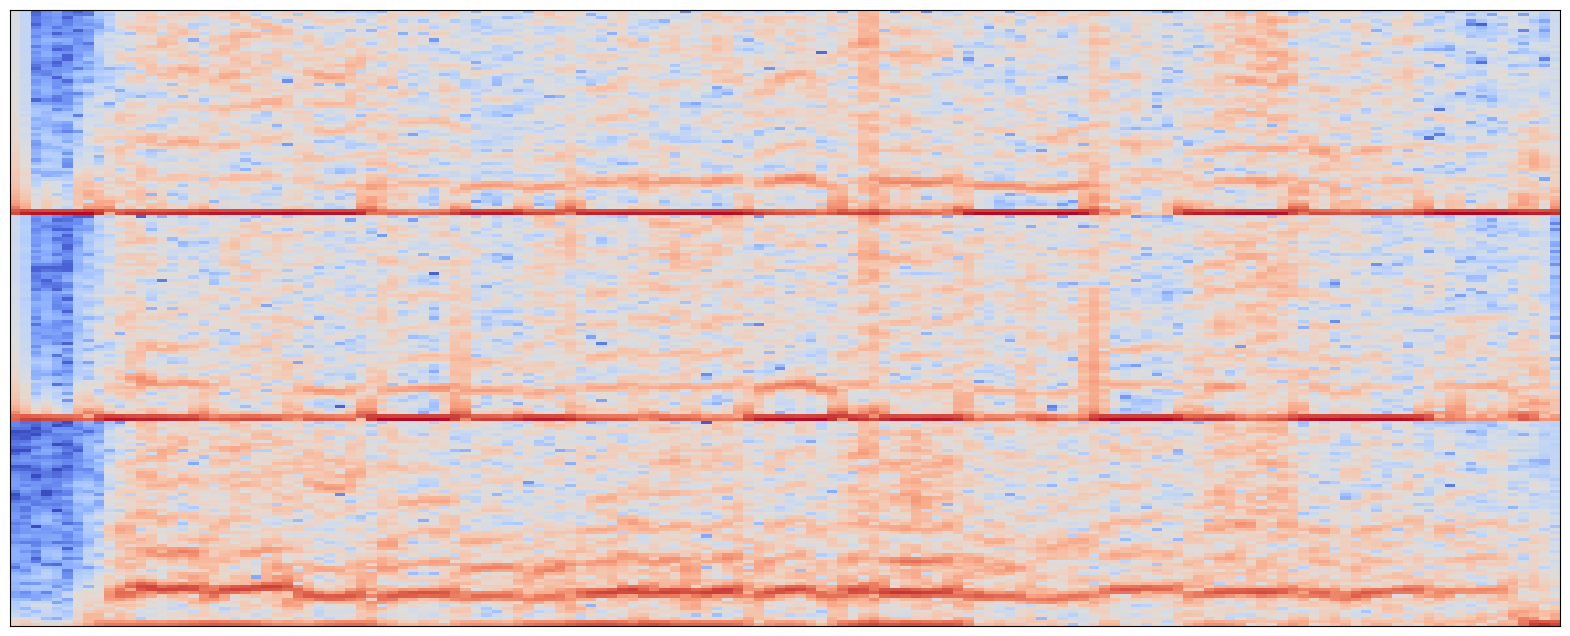

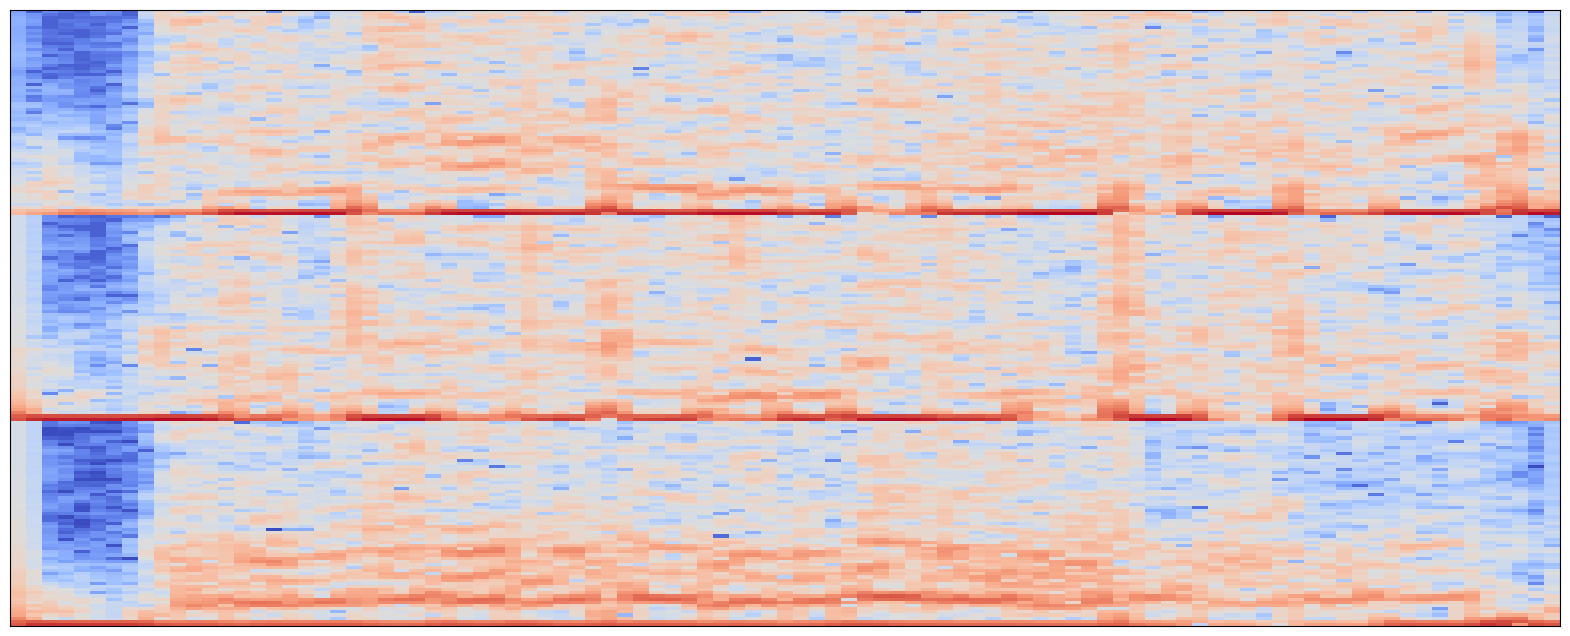

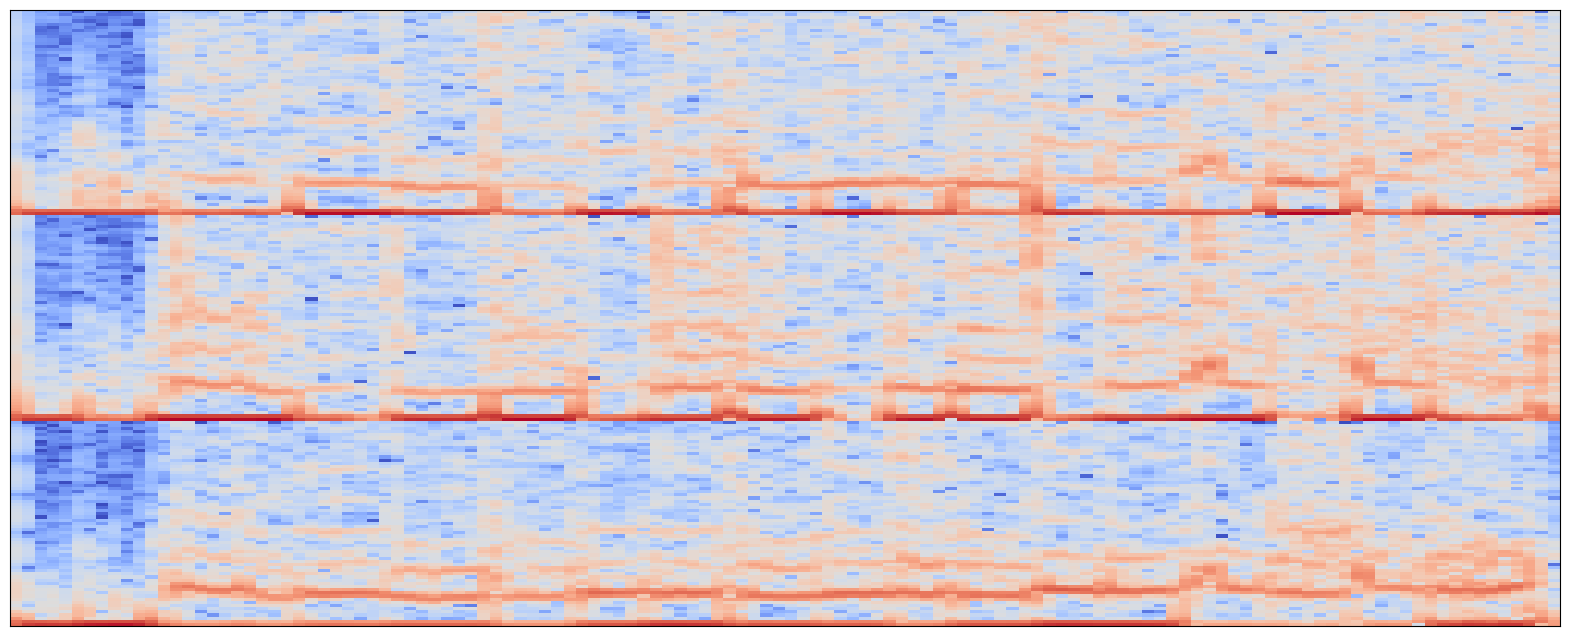

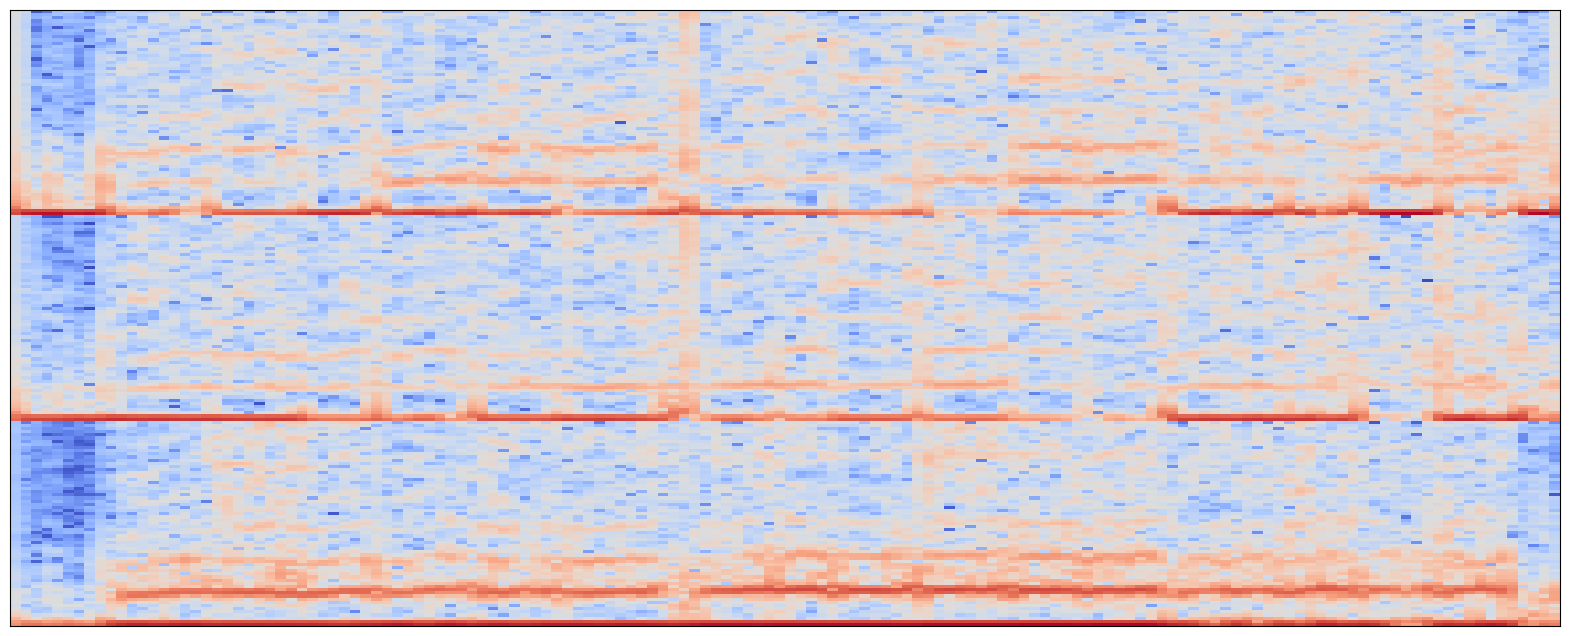

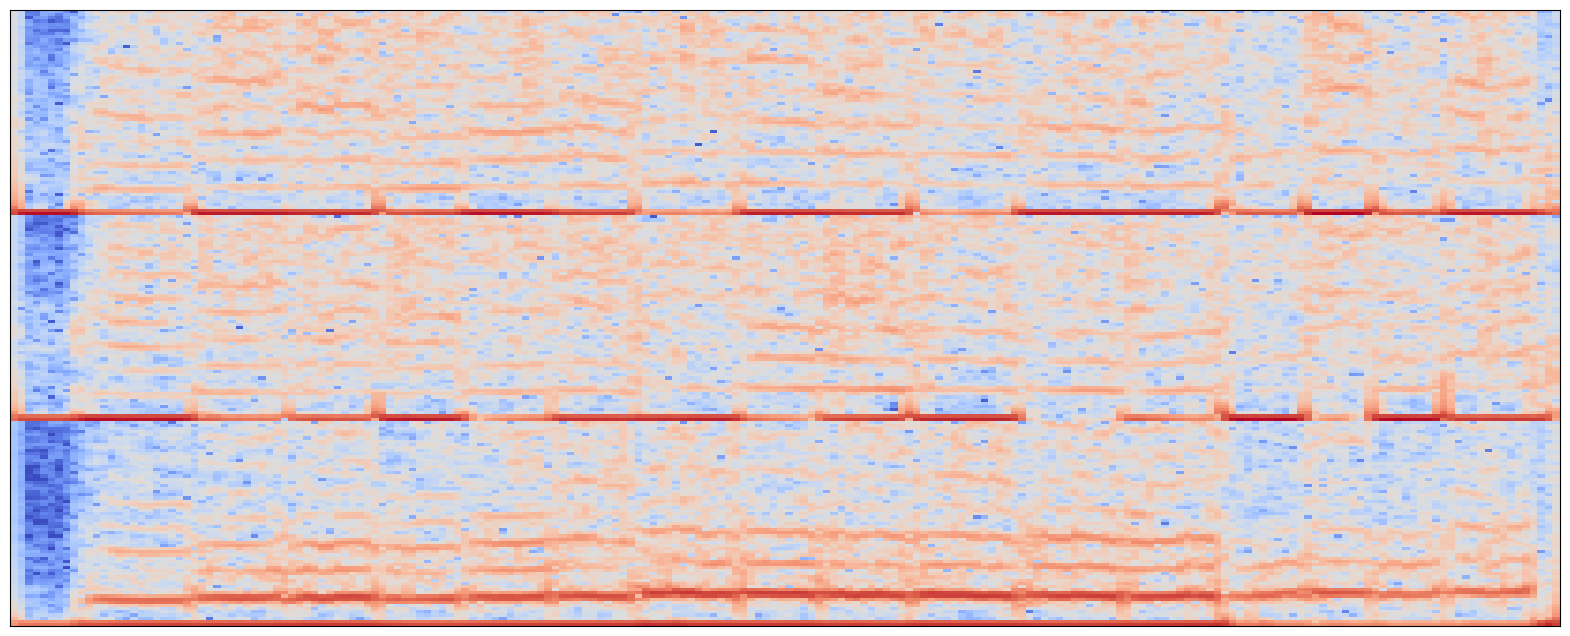

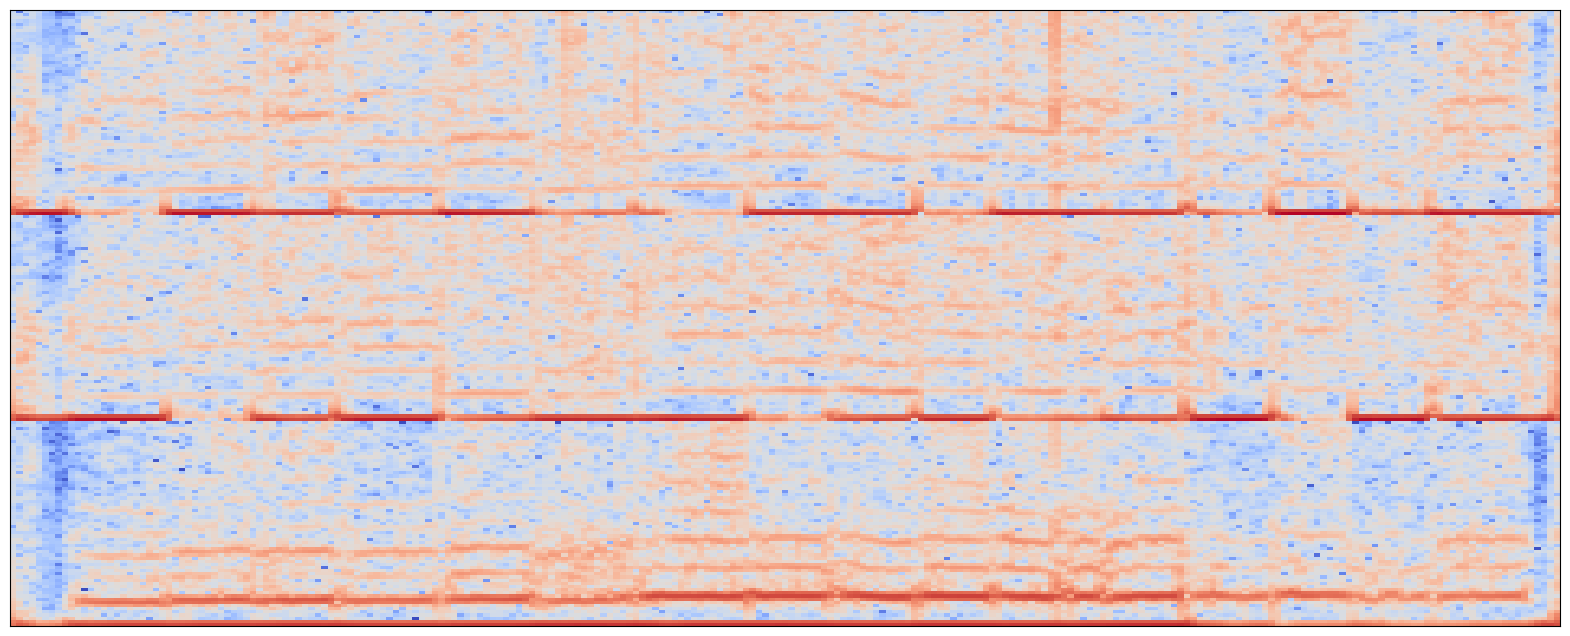

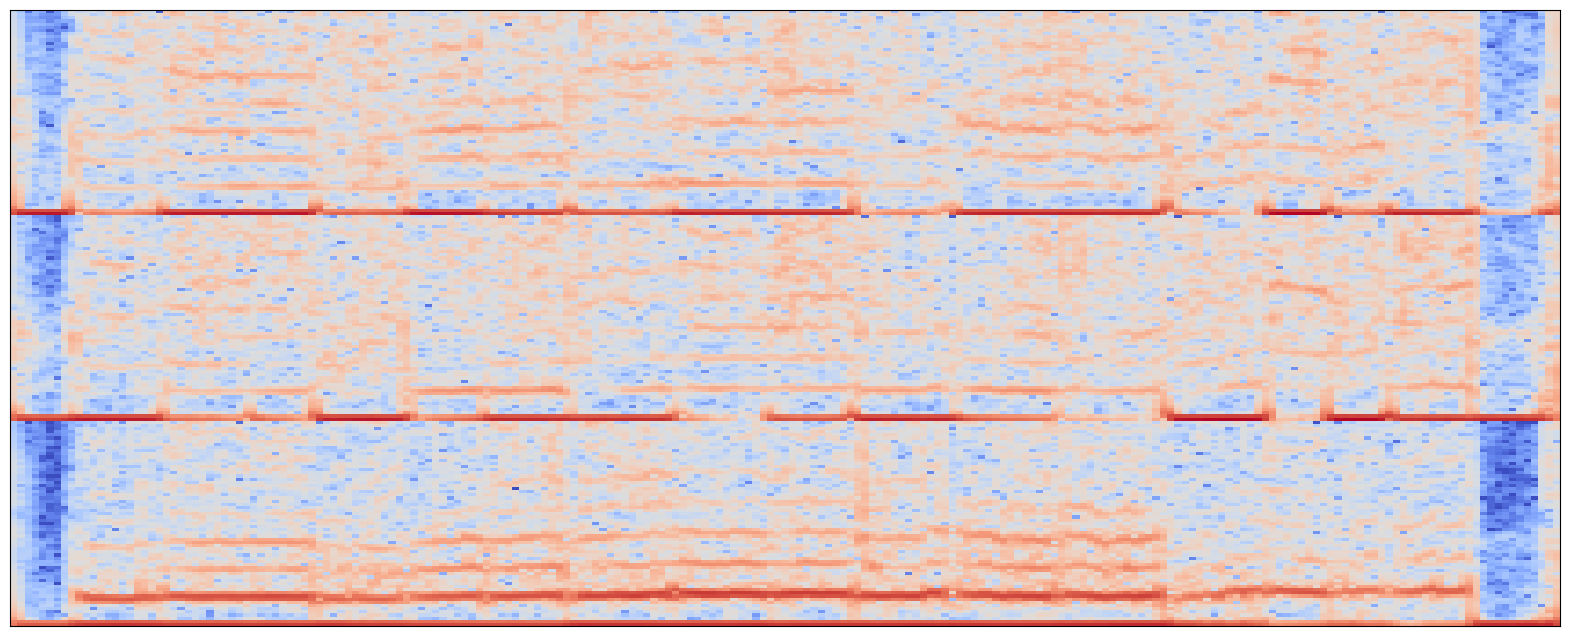

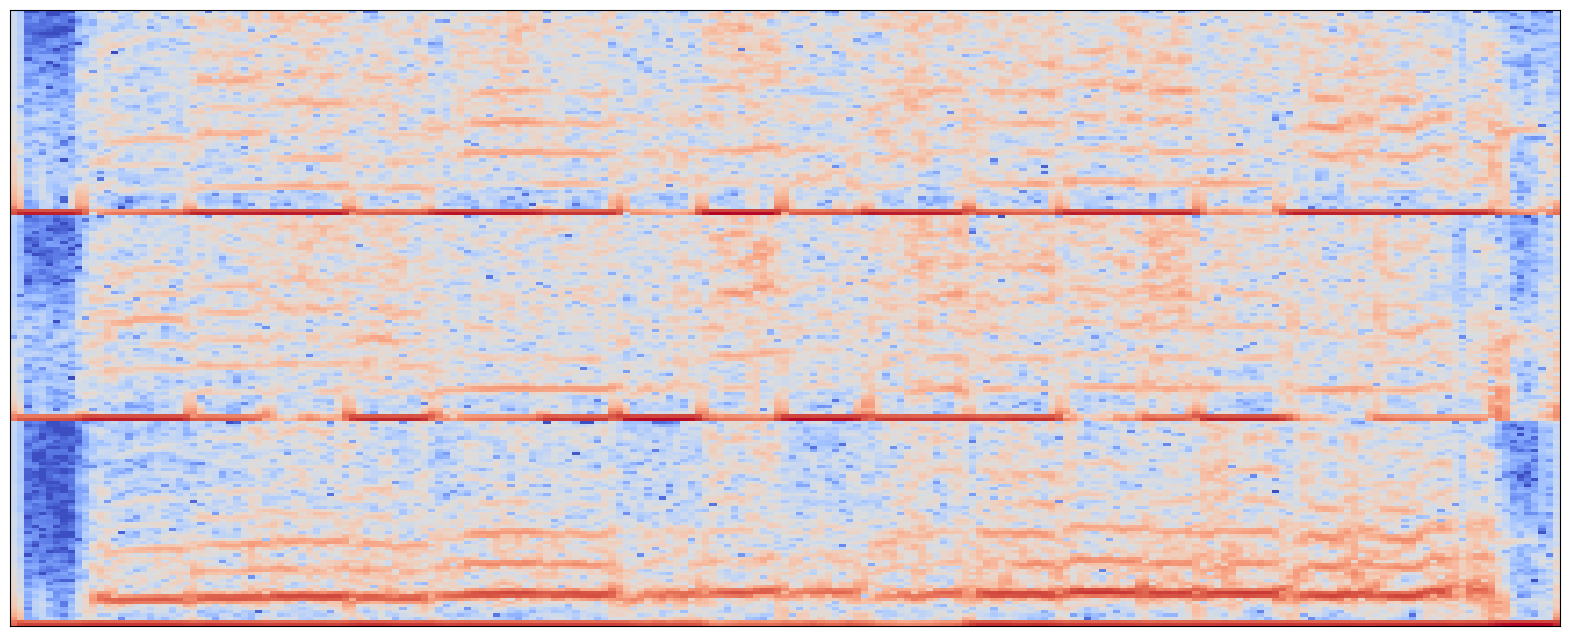

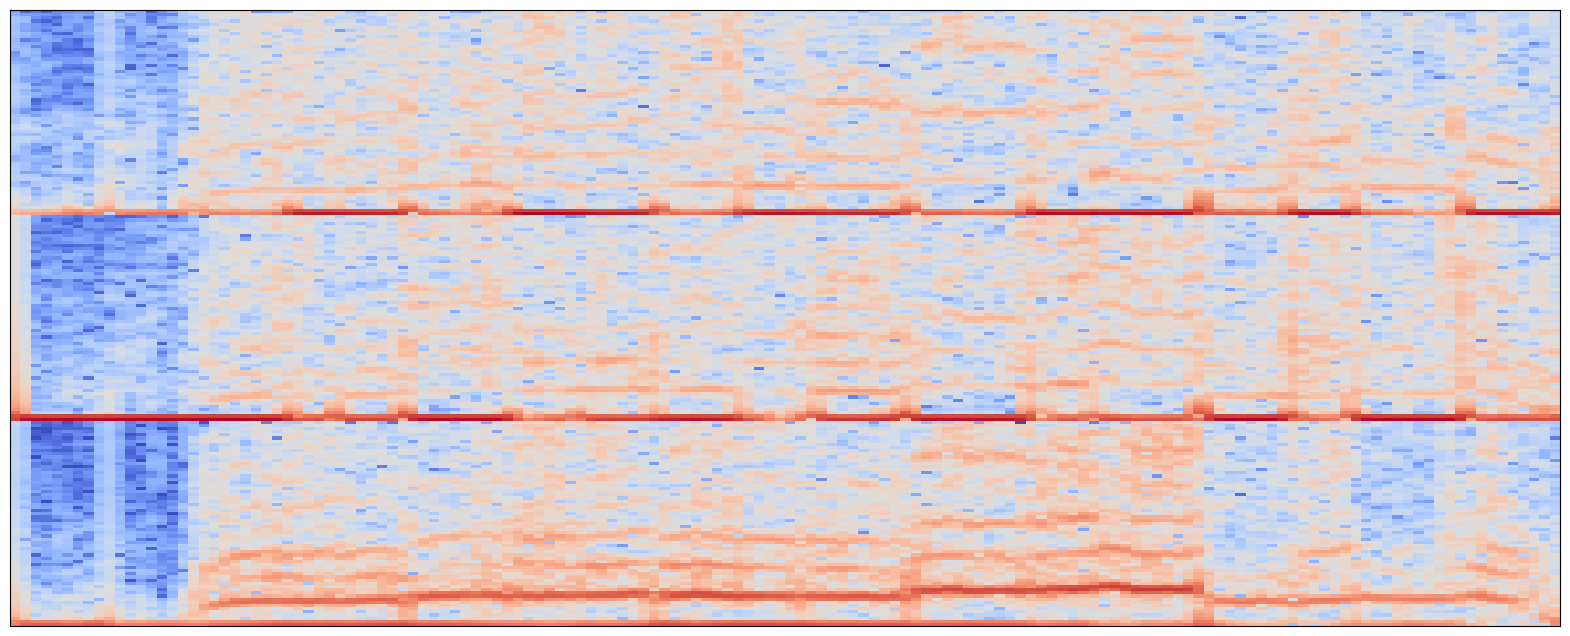

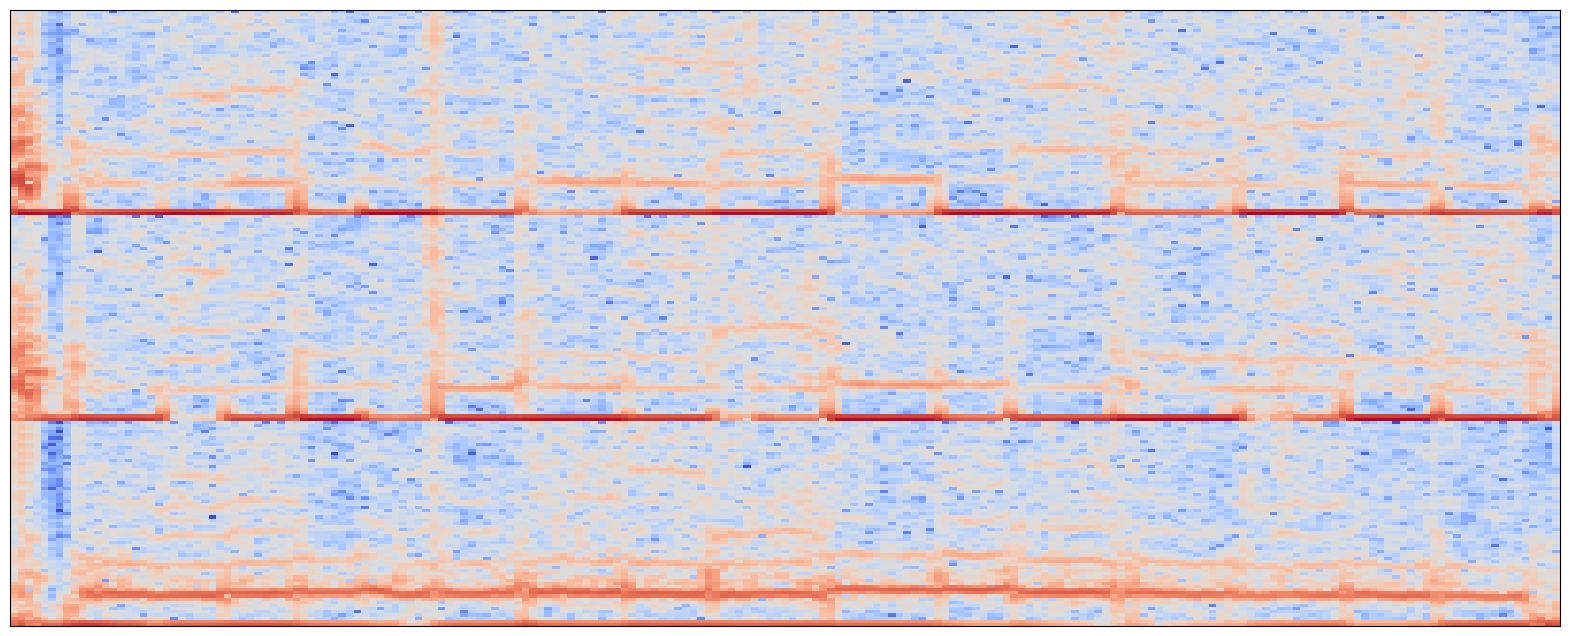

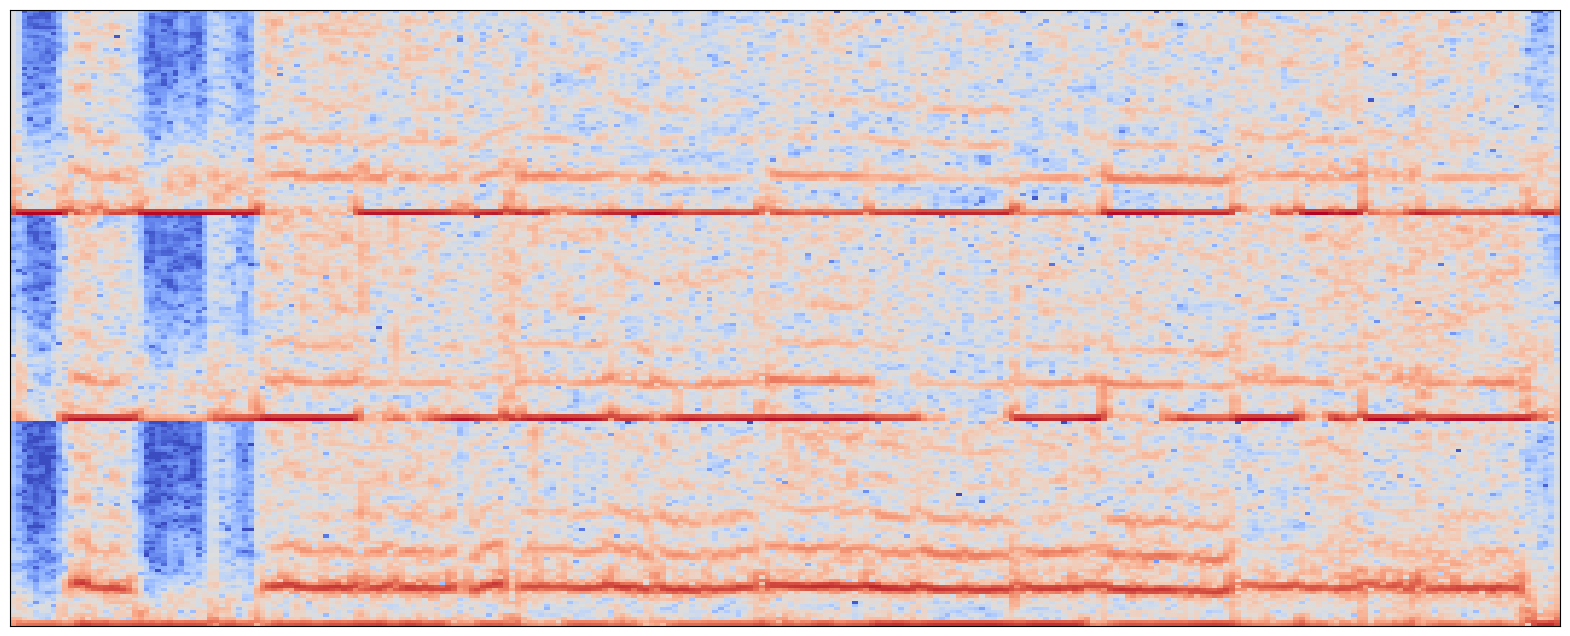

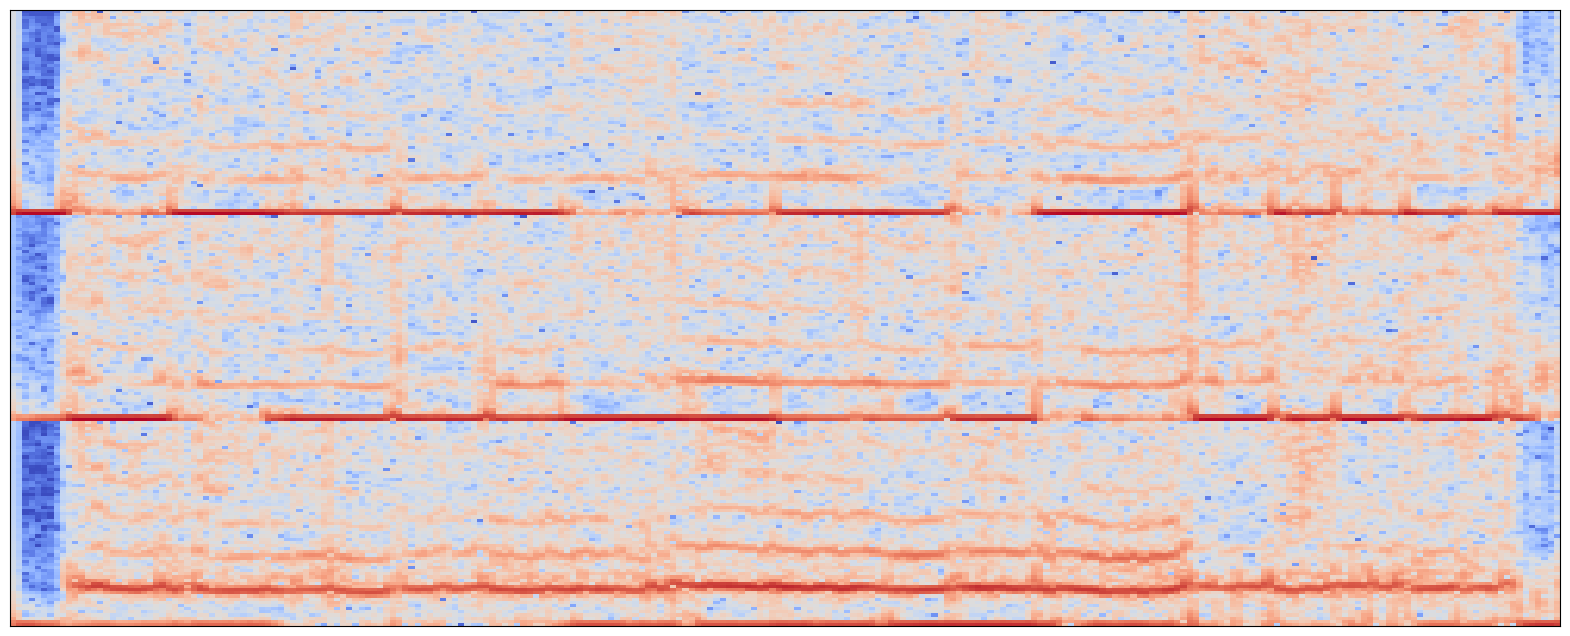

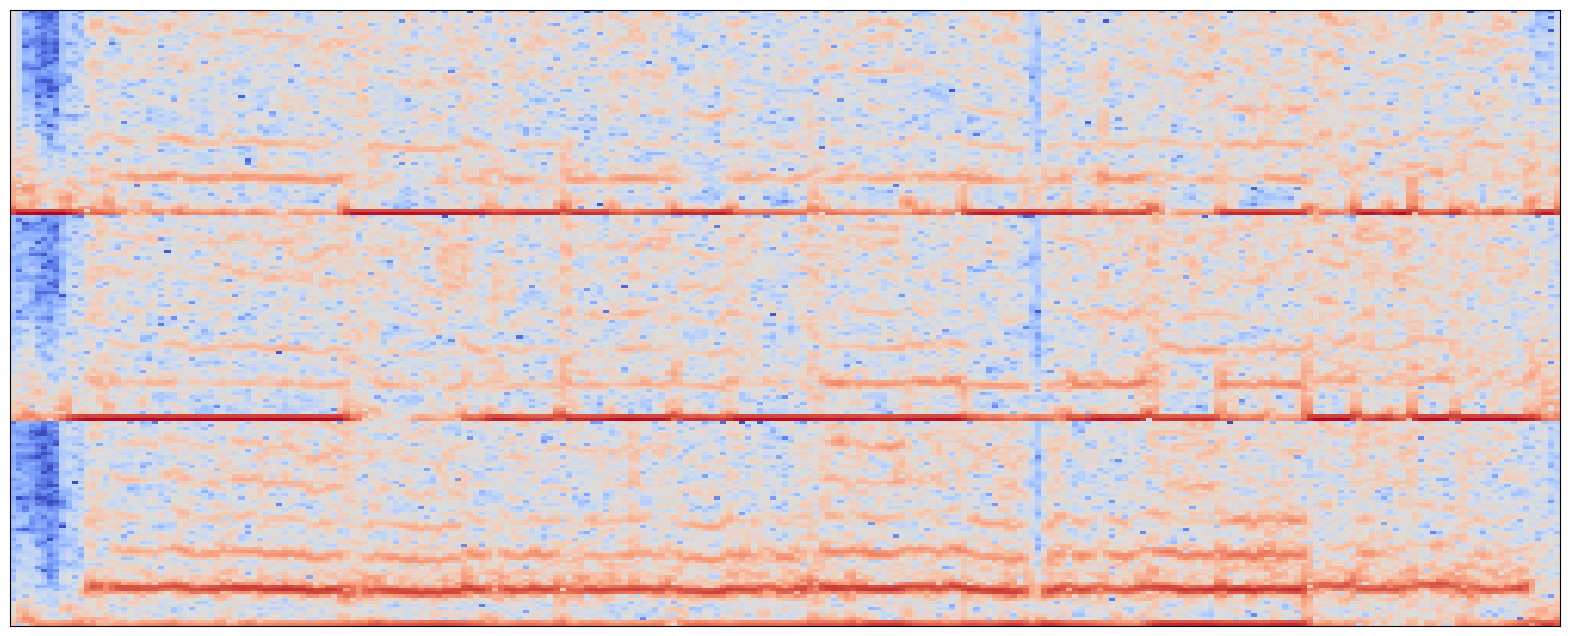

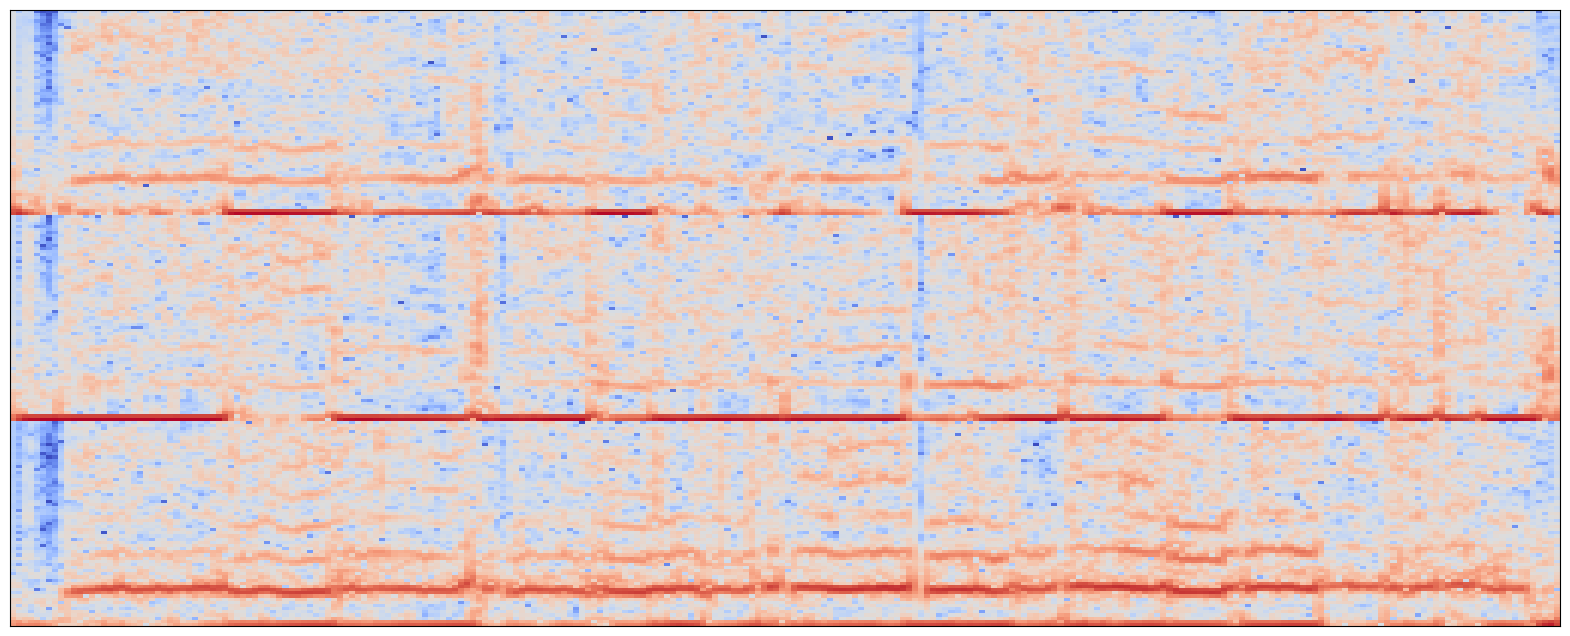

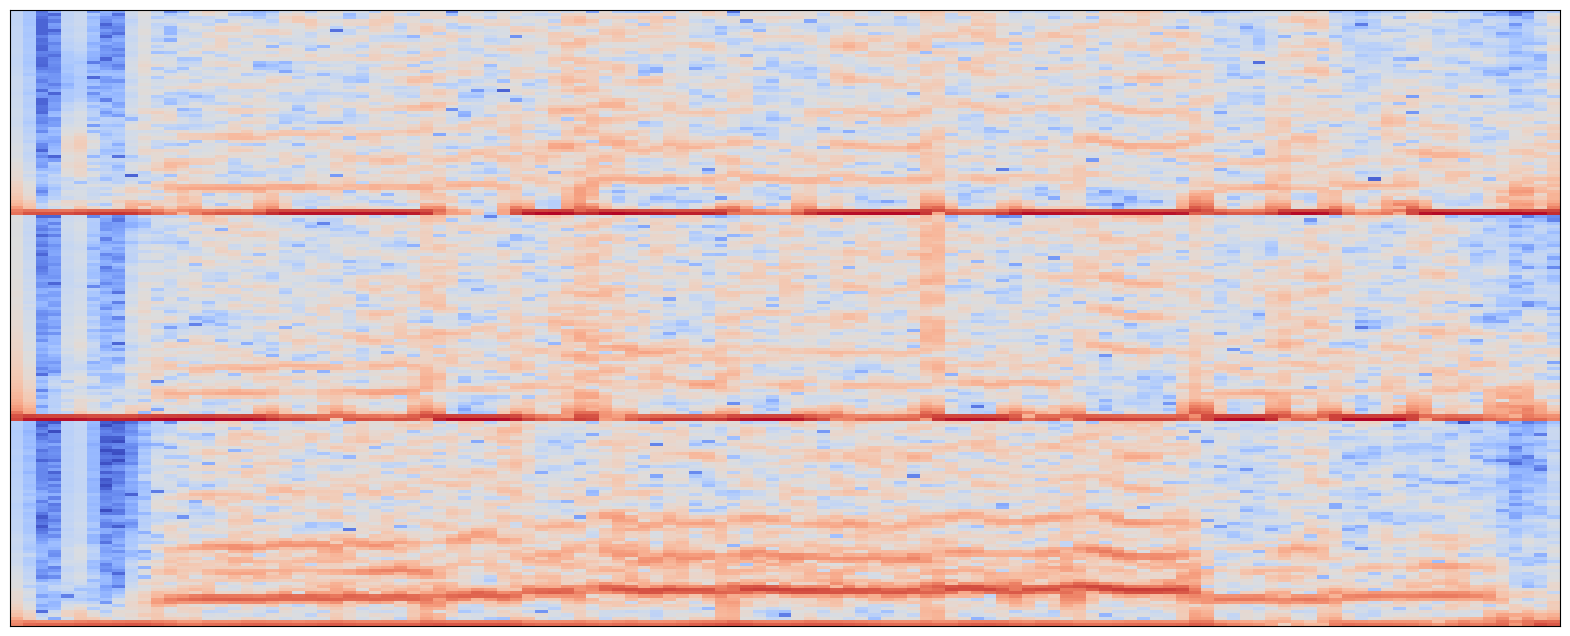

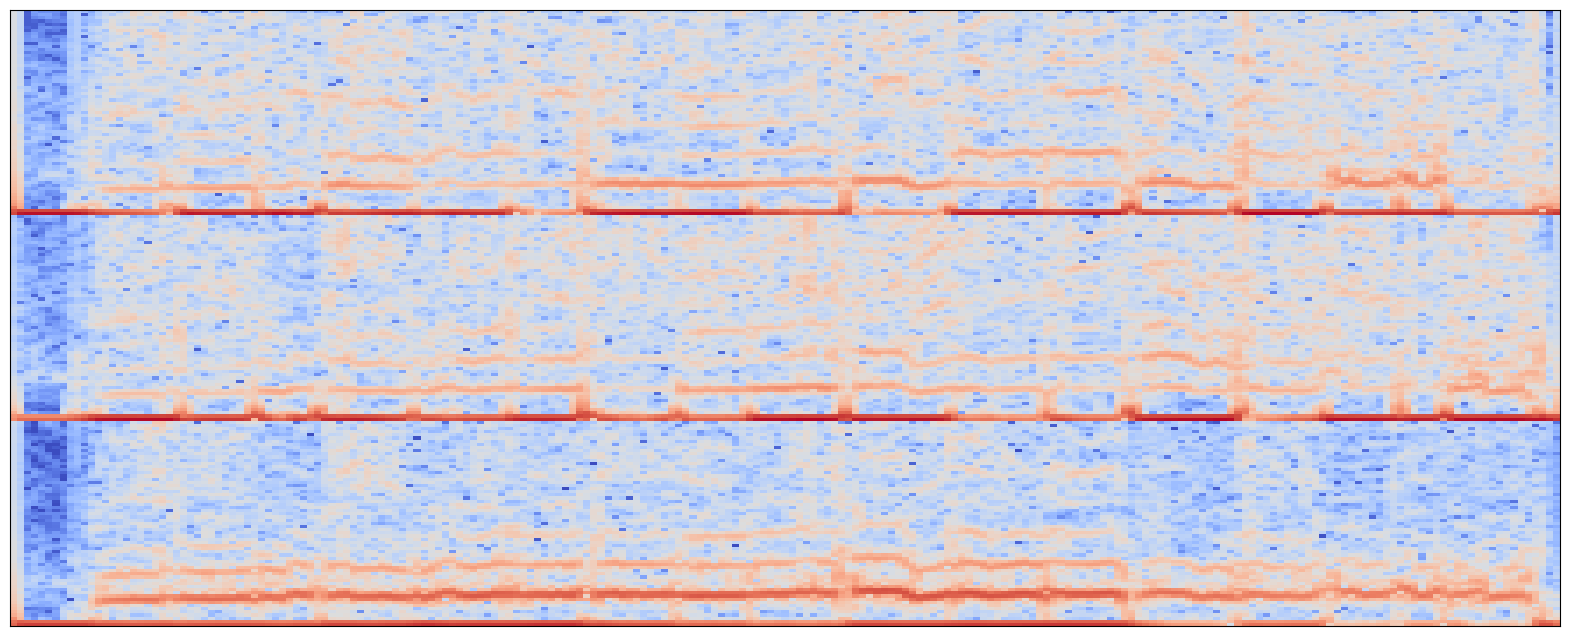

In [14]:

for filename, spec in specs.iterrows():
    #print(filename)
    fig, ax = plt.subplots(1, figsize=(20, 8))
    S = spec.spectrogram
    #S = S[:, 0:400]
    N = numpy.quantile(S, q=0.10, axis=1, keepdims=True)
    #S = S - N
    #print(S.shape, N.shape)
    librosa.display.specshow(ax=ax, data=S)


In [15]:
def to_spectrum(S):
    s = numpy.mean(S, axis=1)
    o = pandas.Series(s, index=numpy.arange(len(s)))
    return o

def compute_spectrums(df, sr, metric='motion', axes=['x', 'y', 'z']):
    dfs = []
    
    for axis in axes:
        c = f'{metric}_{axis}'

        freqs = librosa.fft_frequencies(n_fft=4*hop_length, sr=50)
    
        specs = df.groupby('filename').apply(make_spectrogram, include_groups=False, columns=[c]).to_frame().rename(columns={0:'spectrogram'})
        ss = specs.spectrogram.apply(to_spectrum)
        ss.columns = freqs

        # Normalize
        N = numpy.mean(ss.values, axis=1, keepdims=1)
        ss = pandas.DataFrame(ss-N, columns=ss.columns, index=ss.index)
        
        sf = pandas.melt(ss.reset_index(), id_vars='filename', var_name='frequency')
        sf['axis'] = axis
        
        dfs.append(sf)

    out = pandas.concat(dfs)
    return out

spectrums = compute_spectrums(mm, sr=samplerate, metric='acc')
#spectrums

fig = plotly.express.line(spectrums,
    facet_row='axis',
    color='filename',
    x='frequency',
    y='value',
    height=600,
    width=1000,
    title='Toothbrushing spectrum - Hussain 2021 dataset',
    labels={
        "frequency": "Frequency (Hz)",
        "value": "Energy (dB)",
     },
)

fig.add_vrect(x0=lower, x1=upper, line_width=0, fillcolor="green", opacity=0.2, layer='below')
fig.update_layout(showlegend=False)

ValueError: Length mismatch: Expected axis has 33 elements, new values have 65 elements